# Advanced fMRI data analysis 
## General Linear Model 2


In this assignment, your task is to run simple GLM analysis on fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 22-05-2020

-------------------

 **Po wielu próbach w końcu się udało :)**

## Task 1



Repeat all analyses performed on our last classes (code [HERE](https://github.com/fMRIAnalysisCourse/fmri-analysis-course/blob/master/04-general_linear_model/glm_on_fMRI_data.ipynb)) on the second subject in our dataset (`sub-02`). Explore different plotting possibilities available at `plot_stat_map` method (documentation [HERE](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_stat_map.html)). Also check tutorial [HERE](https://nilearn.github.io/auto_examples/01_plotting/plot_demo_more_plotting.html#sphx-glr-auto-examples-01-plotting-plot-demo-more-plotting-py).



In [1]:
# Loading libraries
! pip install nistats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nistats.first_level_model import FirstLevelModel
from nistats.reporting import plot_design_matrix
from nistats.reporting import plot_contrast_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show
from nistats.thresholding import map_threshold
from nistats.reporting import get_clusters_table

C:\Users\Iga\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  import sys
C:\Users\Iga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Loading a lable with events

events_path = "data/sub-02_task-rhymejudgment_events.tsv"
events = pd.read_csv(events_path, sep="\t")
events.head()

,onset,duration,trial_type
0,20.001,2.0,pseudoword
1,22.501,2.0,pseudoword
2,25.001,2.0,pseudoword
3,27.501,2.0,pseudoword
4,30.001,2.0,pseudoword


In [3]:
# Loading preprocessed fMRI image

fmri_img = "data/sub-02_task-rhymejudgment_space-MNI152NLin2009cAsym_desc-preproc_bold.nii"
confounds_path = "data/sub-02_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, sep="\t")
motion = confounds[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]

In [4]:
#fitting model to the data 

t_r = 2 #time of repetition

first_level_model = FirstLevelModel(t_r, 
                                    hrf_model='spm', #shape of a hemodynamic delay function
                                    high_pass=.01,
                                    smoothing_fwhm=6) #initializing an object (model) with specification

first_level_model = first_level_model.fit(fmri_img, events=events) 

In [5]:
design_matrix = first_level_model.design_matrices_[0]

# Quick look at dataframe

design_matrix.head()

,pseudoword,word,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.111798,0.111782,0.111755,0.111717,0.111669,0.111609,1.0
2.0,0.0,0.0,0.111755,0.111609,0.111367,0.111028,0.110593,0.110062,1.0
4.0,0.0,0.0,0.111669,0.111265,0.110593,0.109655,0.108453,0.106989,1.0
6.0,0.0,0.0,0.111539,0.110749,0.109436,0.107606,0.105268,0.102433,1.0
8.0,0.0,0.0,0.111367,0.110062,0.107899,0.104893,0.101069,0.096457,1.0


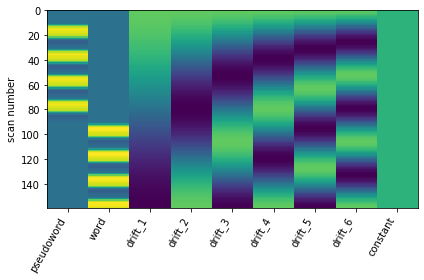

In [6]:
# Plotting design matrix

plot_design_matrix(design_matrix)

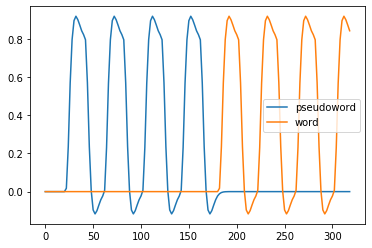

In [7]:
# Printing timeseries 

plt.plot(design_matrix[['pseudoword', 'word']])
plt.legend(['pseudoword', 'word'])

In [10]:
# Conditions

conditions = {'pseudoword': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]), 
              'word': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0])}

In [11]:
# Contrasts

word_minus_pseudoword = conditions['word'] - conditions['pseudoword']
word_effect = conditions['word']

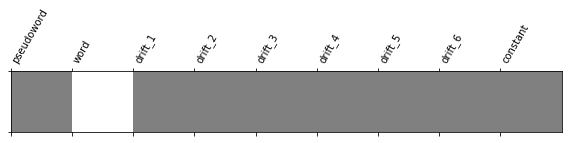

In [12]:
# Plotting contrast matrix

plot_contrast_matrix(word_effect, design_matrix=design_matrix)

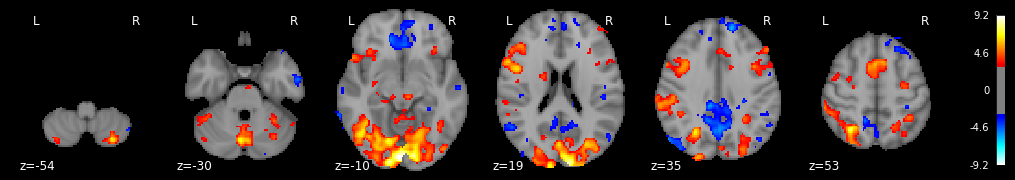

In [13]:
# Statistic test for selected contrast (for word processing)

z_map = first_level_model.compute_contrast(word_effect,
                                  output_type='z_score')
plot_stat_map(z_map, threshold=3,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

Uncorrected p<0.001 threshold: 5.168


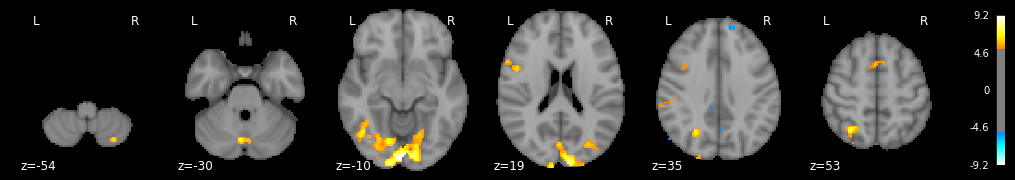

In [32]:
# Thresholding z-maps

_, threshold = map_threshold(z_map, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(z_map, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

In [17]:
# importing glass brain plotting function

from nilearn.plotting import plot_glass_brain

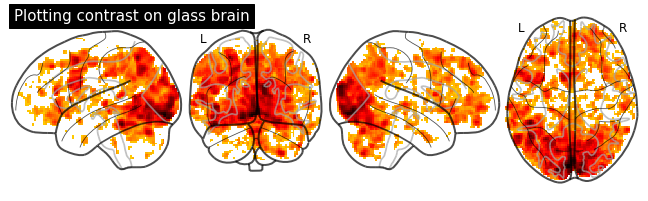

In [60]:
# Plotting contrast on glass brain

stat_img = first_level_model.compute_contrast(word_effect,
                                  output_type='z_score')

plot_glass_brain(stat_img, title='Plotting contrast on glass brain', display_mode='lyrz', threshold=3)
plt.show()

Uncorrected p<0.001 threshold: 5.168


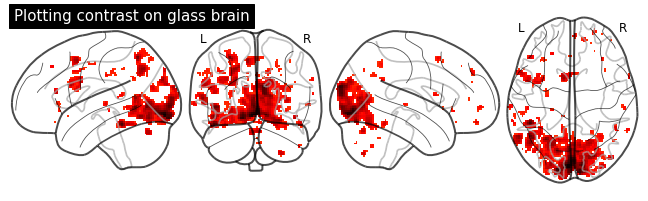

In [34]:
# Plotting contrast on glass brain with corrected threshold

_, threshold = map_threshold(z_map, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_glass_brain(stat_img, title='Plotting contrast on glass brain', display_mode='lyrz', threshold=threshold)
plt.show()

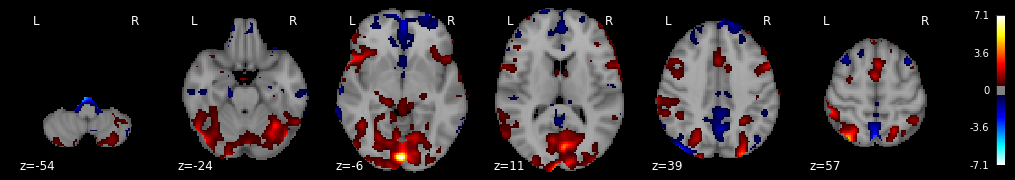

In [42]:
# Exploring different parameters of compute_contrast function & plotting (effect size)

stat = first_level_model.compute_contrast(word_effect,
                                  output_type='effect_size')
plot_stat_map(stat, threshold=0.5,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

Uncorrected p<0.001 threshold: 5.168


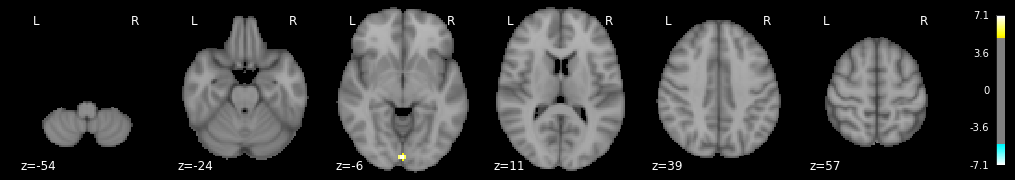

In [43]:
# Effect size with corrected threshold

_, threshold = map_threshold(z_map, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

stat = first_level_model.compute_contrast(word_effect,
                                  output_type='effect_size')
plot_stat_map(stat, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

In [44]:
# Cluster table

table = get_clusters_table(z_map, stat_threshold=threshold,
                           cluster_threshold=20)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-2.5,-90.5,-10.5,9.157358,25688
1,1a,-14.5,-94.5,-14.5,8.603333,
2,1b,9.5,-96.5,19.5,8.485374,
3,1c,11.5,-88.5,-10.5,8.338114,
4,2,-46.5,-42.5,-20.5,8.259308,768
5,3,-44.5,-56.5,-2.5,7.938416,5480
6,3a,-16.5,-72.5,-14.5,7.535024,
7,3b,-44.5,-62.5,-12.5,7.399134,
8,3c,-16.5,-72.5,-10.5,7.358865,
9,4,-28.5,-60.5,53.5,7.746038,2152


## Repeated GLM analysis with design matrix extended by 6 motion parameters

In [45]:
#Motion as nuisance regressors

first_level_model_motion = first_level_model.fit(fmri_img, events=events, confounds=motion)

design_matrix_motion = first_level_model.design_matrices_[0]

In [46]:
# Quick look at dataframe

design_matrix_motion.head()

,pseudoword,word,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.111798,0.111782,0.111755,0.111717,0.111669,0.111609,1.0
2.0,0.0,0.0,0.018734,-0.000013,0.029539,-0.000250,0.000781,0.000226,0.111755,0.111609,0.111367,0.111028,0.110593,0.110062,1.0
4.0,0.0,0.0,0.016760,0.023149,0.060931,-0.000207,0.001009,0.000333,0.111669,0.111265,0.110593,0.109655,0.108453,0.106989,1.0
6.0,0.0,0.0,-0.004947,0.023730,0.034745,-0.000811,0.001009,0.000000,0.111539,0.110749,0.109436,0.107606,0.105268,0.102433,1.0
8.0,0.0,0.0,-0.002534,0.012633,0.060961,-0.000524,0.000959,0.000000,0.111367,0.110062,0.107899,0.104893,0.101069,0.096457,1.0


In [47]:
# Conditions 

conditions_motion = {'pseudoword': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 
                     'word': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
                     'trans_y': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
                     'trans_z': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

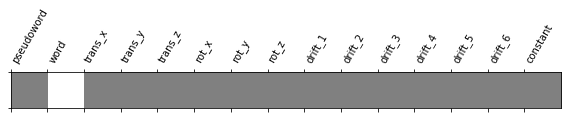

In [48]:
# Contrasts

word_minus_pseudoword_motion = conditions_motion['word'] - conditions_motion['pseudoword']
word_effect_motion = conditions_motion['word']
trans_y = conditions_motion['trans_y']

# Plotting contrasts matrix

plot_contrast_matrix(word_effect_motion, design_matrix=design_matrix_motion)

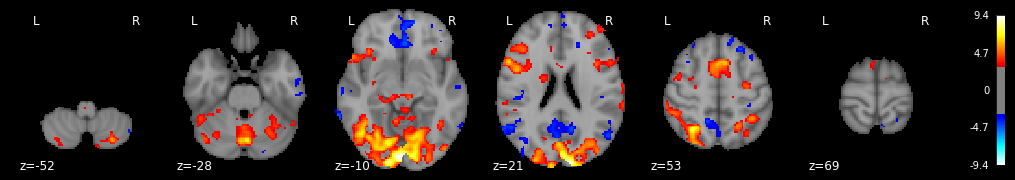

In [49]:
# Statistic test for selected contrast (brain activity for word processing)

z_map_motion = first_level_model.compute_contrast(word_effect_motion,
                                  output_type='z_score')
plot_stat_map(z_map_motion, threshold=3,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

Uncorrected p<0.001 threshold: 5.168


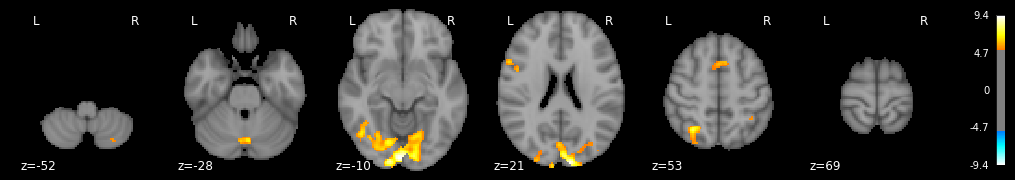

In [50]:
# Thresholding z-maps

_, threshold = map_threshold(z_map_motion, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_stat_map(z_map_motion, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

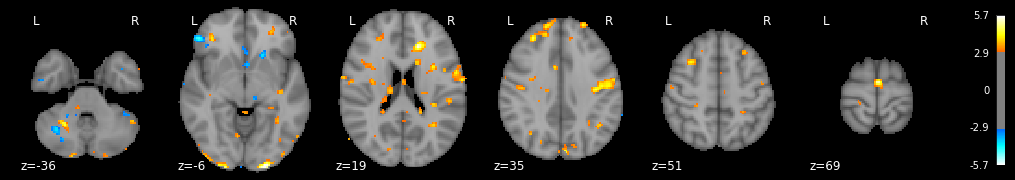

In [51]:
# Contrast for motion effect 
z_map_motion_trans = first_level_model.compute_contrast(trans_y,
                                  output_type='z_score')
plot_stat_map(z_map_motion_trans, threshold=3,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

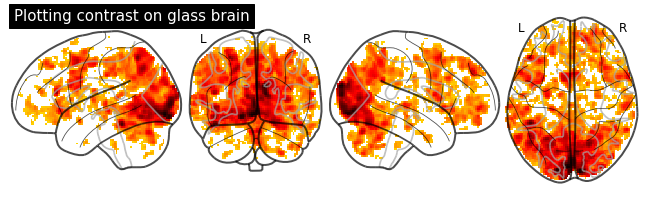

In [58]:
# Plotting contrast on glass brain

z_map_motion1 = first_level_model.compute_contrast(word_effect_motion,
                                  output_type='z_score')

plot_glass_brain(z_map_motion1, title='Plotting contrast on glass brain', display_mode='lyrz', threshold=3)
plt.show()

Uncorrected p<0.001 threshold: 5.168


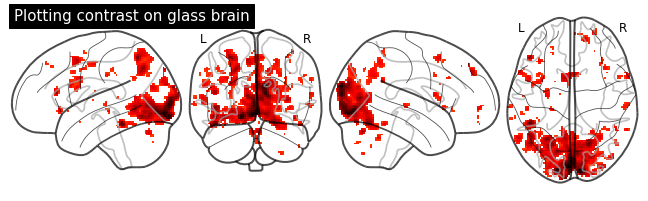

In [59]:
# Plotting contrast on glass brain with corrected thereshold

_, threshold = map_threshold(z_map, alpha=.05, height_control='bonferroni')
print('Uncorrected p<0.001 threshold: %.3f' % threshold)

plot_glass_brain(z_map_motion1, title='Plotting contrast on glass brain', display_mode='lyrz', threshold=threshold)
plt.show()

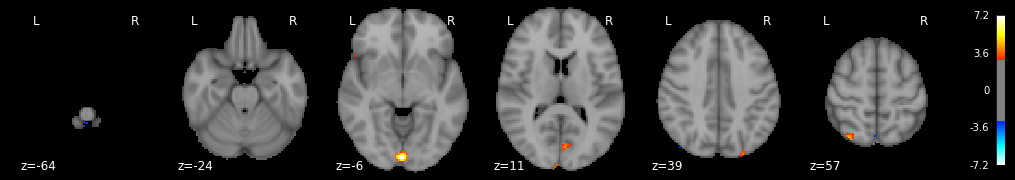

In [62]:
# Exploring different parameters of compute_contrast function & plotting (effect size)

z_map_motion2 = first_level_model.compute_contrast(word_effect_motion,
                                  output_type='effect_size')

plot_stat_map(z_map_motion2, threshold=3,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

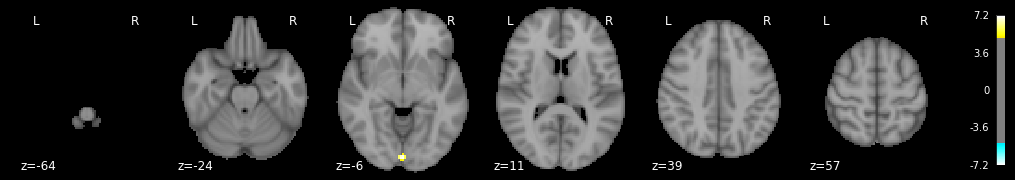

In [64]:
# Effect size with corrected threshold

plot_stat_map(z_map_motion2, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

In [65]:
# Cluster table

table1 = get_clusters_table(z_map_motion, stat_threshold=threshold,
                           cluster_threshold=20)
table1

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-4.5,-90.5,-10.5,9.409920,35896
1,1a,9.5,-96.5,21.5,9.204136,
2,1b,-0.5,-82.5,-6.5,9.075538,
3,1c,-16.5,-94.5,-12.5,8.983618,
4,2,-46.5,-42.5,-20.5,8.453972,760
5,3,-28.5,-60.5,53.5,7.865851,2984
6,3a,-22.5,-64.5,39.5,7.438416,
7,3b,-26.5,-74.5,49.5,5.806952,
8,4,-46.5,29.5,13.5,7.328387,280
9,5,3.5,-72.5,-28.5,6.925643,544
